In [2]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import keras.backend as K
import skimage.io as io
import skimage.transform as tr
import matplotlib.pyplot as plt
from glob import glob
from keras.optimizers import *

from loss_metrics import *
from helper import * 

%matplotlib inline

In [3]:
# load the model
model = load_model('/home/dan/Desktop/Datenset_Tower/results/training_02.h5', custom_objects={'iou_loss': iou_loss})

In [8]:
# read the test-input-data
x = read_imgs('/home/dan/Desktop/Datenset_Tower/test/images/data/*.png', (224,224,1))

# read the test-groundtruth-data
y = read_imgs('/home/dan/Desktop/Datenset_Tower/test/masks/data/*.png', (224,224,1))

/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800


In [11]:
# do the prediction
pred = model.predict(x, verbose=1)

3922/3922 [==============================] - 11s 3ms/step


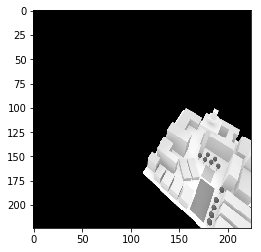

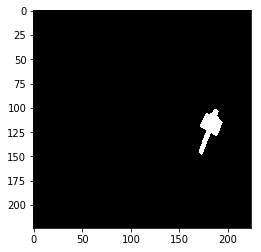

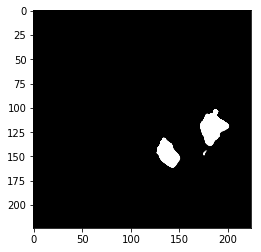

IndexError: index 1 is out of bounds for axis 2 with size 1

In [10]:
# Plots the prediction in jupyter notebook for comparison
i = 500

# Input Picture
plt.imshow(x[i, ..., 0], cmap='gray')
plt.show()

# Ground Truth
plt.imshow(y[i][:,:,0], cmap = 'gray')
plt.show()

# Prediction Dim 0
plt.imshow(pred[i][:,:,0], cmap = 'gray')
plt.show()

# Prediction Dim 1
plt.imshow(pred[i][:,:,1], cmap = 'gray')
plt.show()

# Prediction Dim 2
plt.imshow(pred[i][:,:,2], cmap = 'gray')
plt.show()


In [12]:
import loss_metrics 

print('DSC:       ' + str(f1_np(y, pred)))
print('IoU:       ' + str(iou_np(y, pred)))
print('Precision: ' + str(precision_np(y, pred)))
print('Recall:    ' + str(recall_np(y, pred)))
print('Error:     ' + str(error_np(y, pred)))

DSC:       0.5530149986490813
IoU:       0.38218443328412893
Precision: 0.5269814384130221
Recall:    0.5817546449630693
Error:     0.009741096688059402


In [ ]:
# list all data in history

print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')                      # Benennung des Grafen
plt.ylabel('accuracy')                           # Benennung der y-Achse
plt.xlabel('epoch')                              # Benennung der x-Achse
plt.legend(['train', 'test'], loc='upper left')  # Legende
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')                          # Benennung des Grafen
plt.ylabel('loss')                               # Benennung der y-Achse
plt.xlabel('epoch')                              # Benennung der x-Achse
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# save the images  
import scipy.misc as sc

OutputDir = '/home/dan/Desktop/Datenset_TowerBuilding/test/output'

for i in range(0, len(x)):    
    number = ('0'+ str(i)) if (i < 10) else str(i)
    imagePath = OutputDir + '/pred_' + number + '.png'
    maskPath = OutputDir + '/pred_' + number + '_mask.png'
    sc.imsave(imagePath, x[i, ... ,0])
    sc.imsave(maskPath, pred[i, ... ,0])